In [149]:
# Black friday dataset #EDA -Exploratory data analysis and feature engineering

In [150]:
# cleaning and preparing the data for model training 

In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
# importing the dataset --its ecommerce data

df_train = pd.read_csv("train_blackfri.csv")

df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


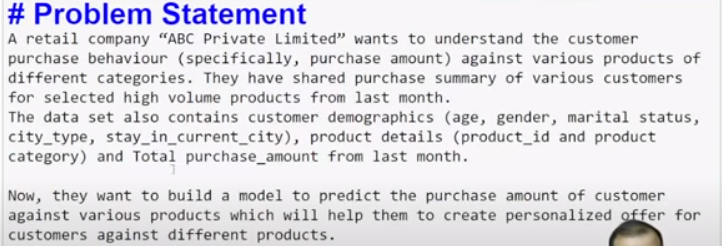

In [234]:
# import test data

df_test = pd.read_csv("test_blackfri.csv")

df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [235]:
# merge the both data sets (train + test)

df=df_train.append(df_test)
df.head()
#df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [236]:
# basic --> we can undersatnd the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [237]:
# here object has the combination of value + letters hence that can be consideered as 
#categorical data

In [238]:
# to get the percentile values 
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [239]:
# here userid is not used hence drop it i coloumn and also Product_ID                  

# axis 1--> Y-axis and axis 0 --> X-axis
# inplace - True --> removes the column 

In [240]:
df.drop(['User_ID'],axis=1,inplace=True)
df.drop(['Product_ID'],axis=1,inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [241]:
# we need to fix the categorical features
# like -->Gender, Age, City_CAtegory, Satay_in_Current_City_Years, Marital_Status

In [242]:
# it gives the 0/1 status

pd.get_dummies(df['Gender'])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [243]:
# Handling the categorical data for Gender

# encode the category with 0 and 1 for 2 cases

# here map function used to replace the values in dataset directly

df['Gender']=df['Gender'].map({'F':0,'M':1}) #--> F-0 & M -1

# or df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [244]:
# Handling the categorical data for Age --> bez here Age has range

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [245]:
# two ways of dealing this with 
#1) ordinal encoding
#2) finding get_dummies, drop_first and add to data set
#3) Label encoding

In [246]:
#pd.get_dummies(df['Age']) --> for th

In [247]:
# Here as per the doman analysis, Age between 26-35,18-25 do lot of shopping then the rest
# So give the rank to the sub-category as per Ascending order --> DONOT GIVE 0

In [248]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7}) 

In [249]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [250]:
#https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

# Label Encoding

In [251]:
# Technique 2
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Age'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()
df.tail()

# for this again we have to transform

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,0,2,15,B,4+,1,8,NaN,NaN,NaN
233595,0,2,15,B,4+,1,5,8.0,NaN,NaN
233596,0,2,15,B,4+,1,1,5.0,12.0,NaN
233597,0,4,1,C,4+,0,10,16.0,NaN,NaN
233598,0,4,0,B,4+,1,4,5.0,NaN,NaN


In [252]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [253]:
# Handling the categorical data for City_Category 
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

#drop_first --> is used if we have 3 categories--> 
#-->2 categories is sufficient to represent all 3 categories

In [254]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [255]:
# hence add this df_city subdata to the main dataset

In [256]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [257]:
# deop city category feature
df.drop('City_Category',axis=1,inplace=True)

In [258]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


In [259]:
## Now check for missing values

In [260]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [261]:
# so Product_Category_2,Product_Category_3 & Purchase has so many NULL values

In [262]:
# Here we focus on Product_Category_2, Product_Category_3 --> Purchase is output

In [263]:
# Doing data exploration for this 

In [264]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [265]:
# these are discrete values/feature & categorical type --> for this data best way to replace 
#NAN values is by technique--> MODE 

In [266]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [267]:
df['Product_Category_2'].mode()

0    8.0
dtype: float64

In [268]:
mode=df['Product_Category_2'].mode()[0]
mode

8.0

In [269]:
df['Product_Category_2']=df['Product_Category_2'].fillna(mode) 

In [270]:
df['Product_Category_2'].isnull().sum()

# zero values means replacemnt has happend

0

In [271]:
# Similarly for Product_Category_3

In [272]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [273]:
df['Product_Category_2'].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [274]:
mode=df['Product_Category_3'].mode()[0]
mode

16.0

In [275]:
df['Product_Category_3']=df['Product_Category_3'].fillna(mode) 

In [276]:
df['Product_Category_3'].isnull().sum()

0

In [277]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,6,16,4+,0,8,8.0,16.0,7969.0,0,1


In [278]:
 df.shape

(783667, 11)

In [279]:
# to handle Stay_In_Current_City_Years data

df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [280]:
# we have 4+ --> to handle tht we can make it as 4 

In [281]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

df['Stay_In_Current_City_Years']

#

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [282]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 61.3+ MB


In [284]:
# So here Stay_In_Current_City_Years  is object --> hence convert it to integer

In [285]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), uint8(2)
memory usage: 58.3 MB


In [286]:
# converting it to int
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 62.8 MB


In [288]:
# visualization

In [289]:
#sns.pairplot(df)

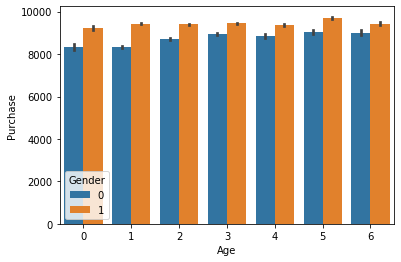

In [290]:
#1 Visulalization of Age vs Purchase wrt Gender
sns.barplot('Age','Purchase',hue='Gender',data=df)

In [291]:
# Conclusion: from this graph male purchases more than female wrt all age groups

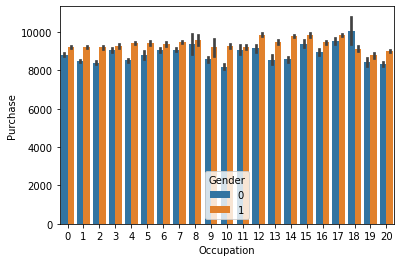

In [292]:
#2 Visulalization of Occupation vs Purchase wrt Gender
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

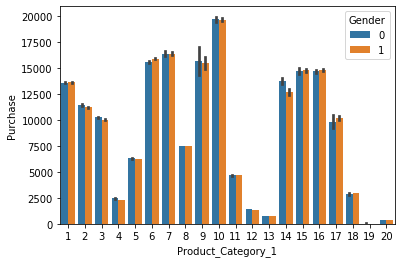

In [293]:
#3 Visulalization of Product category 1 vs Purchase wrt Gender # bez any have purchase Prod cat 1

sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

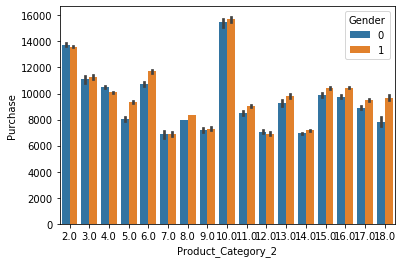

In [294]:
#4 Visulalization of Product category 2 vs Purchase wrt Gender # bez any have purchase Prod cat 1

sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

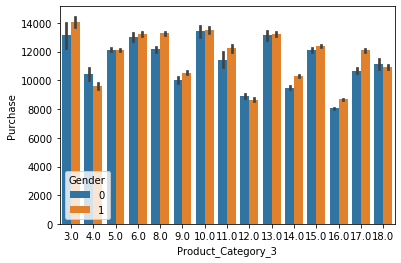

In [295]:
#5 Visulalization of Product category 3 vs Purchase wrt Gender # bez any have purchase Prod cat 1

sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [296]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,0,3,1,4,1,5,14.0,16.0,NaN,1,0
3,0,3,1,4,1,4,9.0,16.0,NaN,1,0
4,0,2,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,2,15,4,1,8,8.0,16.0,NaN,1,0
233595,0,2,15,4,1,5,8.0,16.0,NaN,1,0
233596,0,2,15,4,1,1,5.0,12.0,NaN,1,0
233597,0,4,1,4,0,10,16.0,16.0,NaN,0,1


In [301]:
df_purchase=df['Purchase']
df_purchase



0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
233594        NaN
233595        NaN
233596        NaN
233597        NaN
233598        NaN
Name: Purchase, Length: 783667, dtype: float64

In [304]:
df.drop('Purchase',axis=1,inplace=True)

In [305]:
df=pd.concat([df,df_purchase],axis=1) #to move purchase column at last
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C,Purchase
0,0,0,10,2,0,3,8.0,16.0,0,0,8370.0
1,0,0,10,2,0,1,6.0,14.0,0,0,15200.0
2,0,0,10,2,0,12,8.0,16.0,0,0,1422.0
3,0,0,10,2,0,12,14.0,16.0,0,0,1057.0
4,1,6,16,4,0,8,8.0,16.0,0,1,7969.0


In [306]:
# test data---> only contains NAN

df_test=df[df['Purchase'].isnull()]

df_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C,Purchase
0,1,4,7,2,1,1,11.0,16.0,1,0,NaN
1,1,2,17,0,0,3,5.0,16.0,0,1,NaN
2,0,3,1,4,1,5,14.0,16.0,1,0,NaN
3,0,3,1,4,1,4,9.0,16.0,1,0,NaN
4,0,2,1,1,0,4,5.0,12.0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,2,15,4,1,8,8.0,16.0,1,0,NaN
233595,0,2,15,4,1,5,8.0,16.0,1,0,NaN
233596,0,2,15,4,1,1,5.0,12.0,1,0,NaN
233597,0,4,1,4,0,10,16.0,16.0,0,1,NaN


In [307]:
# train data --> only contains values

df_train=df[-df['Purchase'].isnull()]

df_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C,Purchase
0,0,0,10,2,0,3,8.0,16.0,0,0,8370.0
1,0,0,10,2,0,1,6.0,14.0,0,0,15200.0
2,0,0,10,2,0,12,8.0,16.0,0,0,1422.0
3,0,0,10,2,0,12,14.0,16.0,0,0,1057.0
4,1,6,16,4,0,8,8.0,16.0,0,1,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,8.0,16.0,1,0,368.0
550064,0,2,1,3,0,20,8.0,16.0,0,1,371.0
550065,0,2,15,4,1,20,8.0,16.0,1,0,137.0
550066,0,6,1,2,0,20,8.0,16.0,0,1,365.0


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [317]:
X=df_train.drop('Purchase',axis=1)

In [318]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,0,10,2,0,3,8.0,16.0,0,0
1,0,0,10,2,0,1,6.0,14.0,0,0
2,0,0,10,2,0,12,8.0,16.0,0,0
3,0,0,10,2,0,12,14.0,16.0,0,0
4,1,6,16,4,0,8,8.0,16.0,0,1


In [319]:
X.shape

(550068, 10)

In [320]:
y=df_train['Purchase']
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [321]:
y.shape

(550068,)

In [322]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [323]:
# Feature Scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [324]:
X_train

array([[ 0.57141282, -1.10505734,  0.90867822, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 0.57141282,  1.84716932, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       [ 0.57141282,  0.37105599,  1.36872445, ..., -1.09182956,
        -0.85056064,  1.48627336],
       ...,
       [-1.75004823, -1.10505734, -1.08485545, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064, -0.67282374]])

In [325]:
X_test

array([[ 0.57491817,  1.85432241,  1.67314502, ...,  0.36853635,
        -0.85317164,  1.490841  ],
       [-1.73937798,  0.37396835,  0.44724923, ...,  0.36853635,
         1.1720971 , -0.67076234],
       [-1.73937798,  0.37396835, -1.23835749, ...,  0.36853635,
        -0.85317164, -0.67076234],
       ...,
       [ 0.57491817, -1.10638572, -0.93188354, ...,  0.36853635,
        -0.85317164,  1.490841  ],
       [ 0.57491817,  0.37396835, -0.16569867, ...,  0.00396261,
        -0.85317164,  1.490841  ],
       [ 0.57491817, -1.10638572, -0.62540959, ...,  0.36853635,
         1.1720971 , -0.67076234]])

In [ ]:
# Train your ML model